In [1]:
# memastikan tensorflow yang digunakan adalah versi 2 keatas
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
# Mempersiapkan data

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-11-30 11:47:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  6.45MB/s    in 14s     

2020-11-30 11:47:37 (4.66 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [5]:
# melakukan ekstraksi dataset
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
# Melihat struktur dataset

import os
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['clean', 'messy']

In [7]:
# menampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabeL

# membuat direktori ruangan rapi pada data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [10]:
# Membuat objek ImageDataGenerator pada data train dan data test dengan augmentasi gambar

# import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator pada data train
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')

# ImageDataGenerator pada data test
test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')

In [11]:
# mempersiapkan data latih dengan objek image data generator

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori latih
    target_size = (150,150), # mengubah resolusi seluruh gamabr menjadi 150x150 pixel
    batch_size = 4,
    # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150,150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size = 4, # karena kita meruapakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
# Membuat arsitektur CNN pada Keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
# Memanggil fungsi compile pada objek dan menentukan loss function serta optimizer

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# Melatih model dengan metode fit
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan epochs jika akurasi model belum optimal
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps = 5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose = 2
)

Epoch 1/20
25/25 - 6s - loss: 0.7411 - accuracy: 0.4900 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6986 - accuracy: 0.5900 - val_loss: 0.6797 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 6s - loss: 0.6953 - accuracy: 0.5500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6984 - accuracy: 0.4400 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6935 - accuracy: 0.4800 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6887 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 6s - loss: 0.6970 - accuracy: 0.5600 - val_loss: 0.6893 - val_accuracy: 0.6000
Epoch 8/20
25/25 - 6s - loss: 0.6823 - accuracy: 0.5700 - val_loss: 0.6136 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 6s - loss: 0.6566 - accuracy: 0.6700 - val_loss: 0.6506 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 6s - loss: 0.6164 - accuracy: 0.6900 - val_loss: 0.5780 - val_accuracy: 0.6500
Epoch 11/20
25/25 -

Saving 2.png to 2.png
2.png
messy


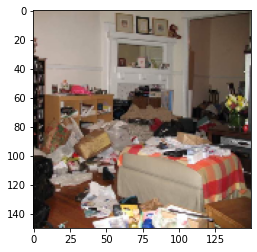

In [19]:
# Membuat prediksi model

# import library
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Memanggil fungsi uploaded
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')